# Diluted Unitary Fitting, Analysis

In [59]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [60]:
def resample_diluted(diluted_model, num_samples, rng):
    d = diluted_model.channel.d
    c = diluted_model.channel.c
    rank = diluted_model.channel.rank
    spectrum_resample_list = []
    for i in range(num_samples):
        diluted_resample = DilutedKrausMap(U=generate_haar_random(d, rng=rng), c=c, kraus_part=KrausMap(d, rank = rank))
        spectrum_resample = channel_spectrum(diluted_resample, use_coords=True, keep_real=False)
        spectrum_resample_list.append(spectrum_resample)
    
    spectrum_resample = np.real(np.concatenate(spectrum_resample_list))
    
    return spectrum_resample

In [61]:
[channel_list1, channel_list2, channel_list3, channel_list4, channel_list5, channel_list6, channel_list7] = loader(data_path("channel_fullRank_belem_longTrain.p"))

spectrum_target_list1 = [channel_spectrum(channel, use_coords=True, keep_real=False) for channel in channel_list1]
spectrum_target_list2 = [channel_spectrum(channel, use_coords=True, keep_real=False) for channel in channel_list2]
spectrum_target_list3 = [channel_spectrum(channel, use_coords=True, keep_real=False) for channel in channel_list3]
spectrum_target_list4 = [channel_spectrum(channel, use_coords=True, keep_real=False) for channel in channel_list4]
spectrum_target_list5 = [channel_spectrum(channel, use_coords=True, keep_real=False) for channel in channel_list5]
spectrum_target_list6 = [channel_spectrum(channel, use_coords=True, keep_real=False) for channel in channel_list6]
spectrum_target_list7 = [channel_spectrum(channel, use_coords=True, keep_real=False) for channel in channel_list7]

In [70]:
[distance_best_list1, model_best_list1] = loader(data_path("diluted_fitting_8layer.model"))
[distance_best_list2, model_best_list2] = loader(data_path("diluted_fitting_16layer.model"))
[distance_best_list3, model_best_list3] = loader(data_path("diluted_fitting_24layer.model"))
[distance_best_list4, model_best_list4] = loader(data_path("diluted_fitting_32layer.model"))

In [63]:
print(f"Mean Error, Std Error, Max Error, Min Error")
print(f"{np.mean(distance_best_list1):.4f}, {np.std(distance_best_list1):.4f}, {np.max(distance_best_list1):.4f}, {np.min(distance_best_list1):.4f}")
print(f"{np.mean(distance_best_list2):.4f}, {np.std(distance_best_list2):.4f}, {np.max(distance_best_list2):.4f}, {np.min(distance_best_list2):.4f}")
print(f"{np.mean(distance_best_list3):.4f}, {np.std(distance_best_list3):.4f}, {np.max(distance_best_list3):.4f}, {np.min(distance_best_list3):.4f}")
print(f"{np.mean(distance_best_list4):.4f}, {np.std(distance_best_list4):.4f}, {np.max(distance_best_list4):.4f}, {np.min(distance_best_list4):.4f}")
#print(f"{np.mean(distance_best_list5):.4f}, {np.std(distance_best_list5):.4f}, {np.max(distance_best_list5):.4f}, {np.min(distance_best_list5):.4f}")
#print(f"{np.mean(distance_best_list6):.4f}, {np.std(distance_best_list6):.4f}, {np.max(distance_best_list6):.4f}, {np.min(distance_best_list6):.4f}")
#print(f"{np.mean(distance_best_list7):.4f}, {np.std(distance_best_list7):.4f}, {np.max(distance_best_list7):.4f}, {np.min(distance_best_list7):.4f}")

Mean Error, Std Error, Max Error, Min Error
0.0006, 0.0006, 0.0022, 0.0001
0.0636, 0.0037, 0.0679, 0.0550
0.0783, 0.0034, 0.0839, 0.0713
0.0892, 0.0076, 0.1053, 0.0817


## Diluted Unitary Histogram Overlay

In [64]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample_list = []
for diluted_model in tqdm(model_best_list1):
    spectrum_resample = resample_diluted(diluted_model, num_samples = 1000, rng=rng)
    spectrum_resample_list.append(spectrum_resample)
    
spectrum_resample = np.concatenate(spectrum_resample_list)

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


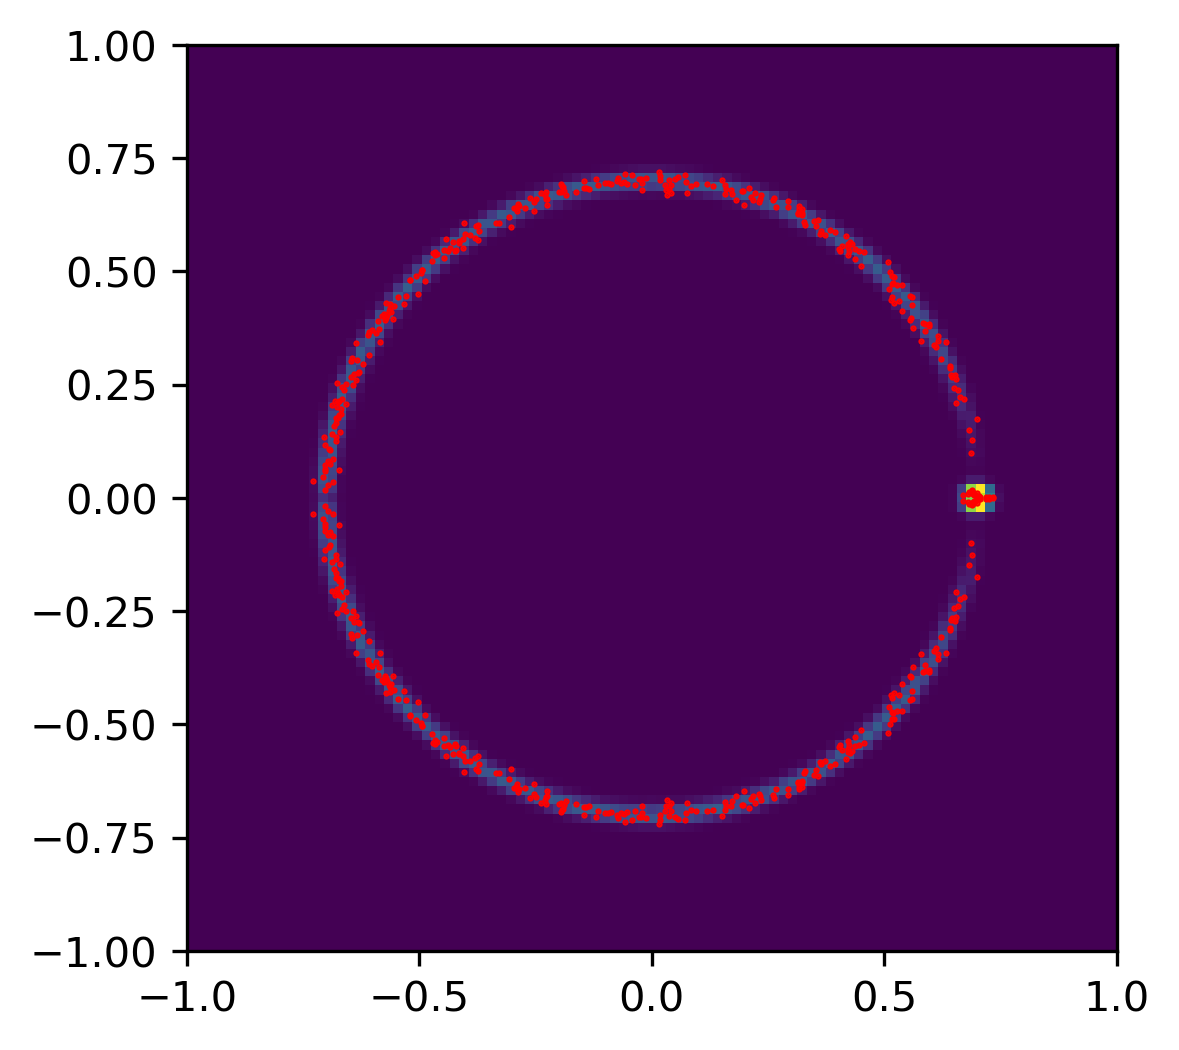

In [67]:
fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 100), density=True)
for spectrum in spectrum_target_list1:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=0.5)
plt.savefig(image_path("diluted_fitting_8layer.pdf"), bbox_inches='tight')
plt.show()

In [10]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample_list = []
for diluted_model in tqdm(model_best_list2):
    spectrum_resample = resample_diluted(diluted_model, num_samples = 1000, rng=rng)
    spectrum_resample_list.append(spectrum_resample)
    
spectrum_resample = np.concatenate(spectrum_resample_list)

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


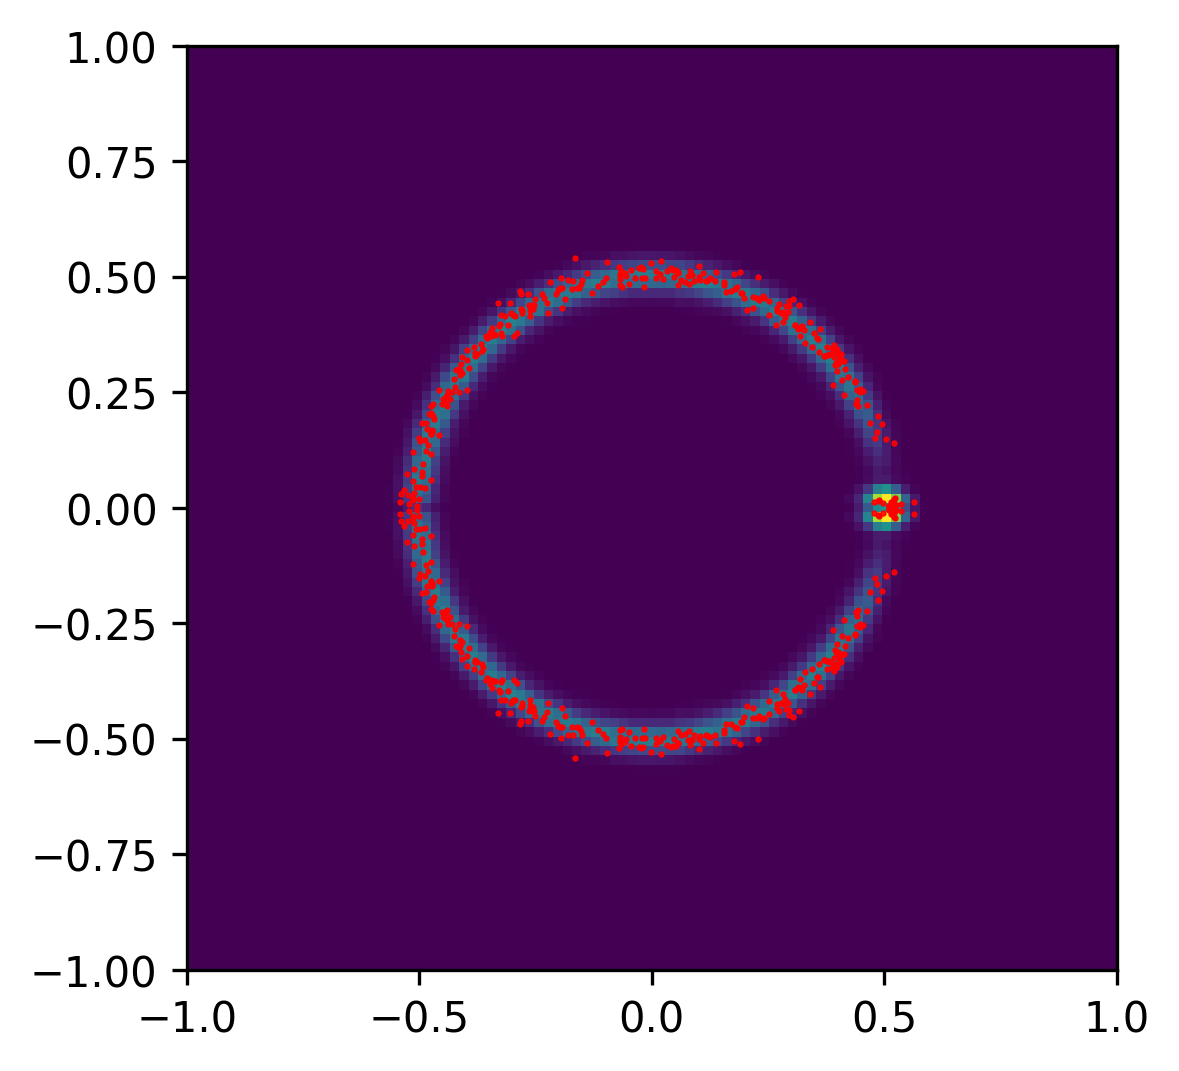

In [11]:
fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 100))
for spectrum in spectrum_target_list2:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=0.5)

plt.savefig(image_path("diluted_fitting_16layer.pdf"), bbox_inches='tight')
plt.show()

In [12]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample_list = []
for diluted_model in tqdm(model_best_list3):
    spectrum_resample = resample_diluted(diluted_model, num_samples = 1000, rng=rng)
    spectrum_resample_list.append(spectrum_resample)
    
spectrum_resample = np.concatenate(spectrum_resample_list)

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


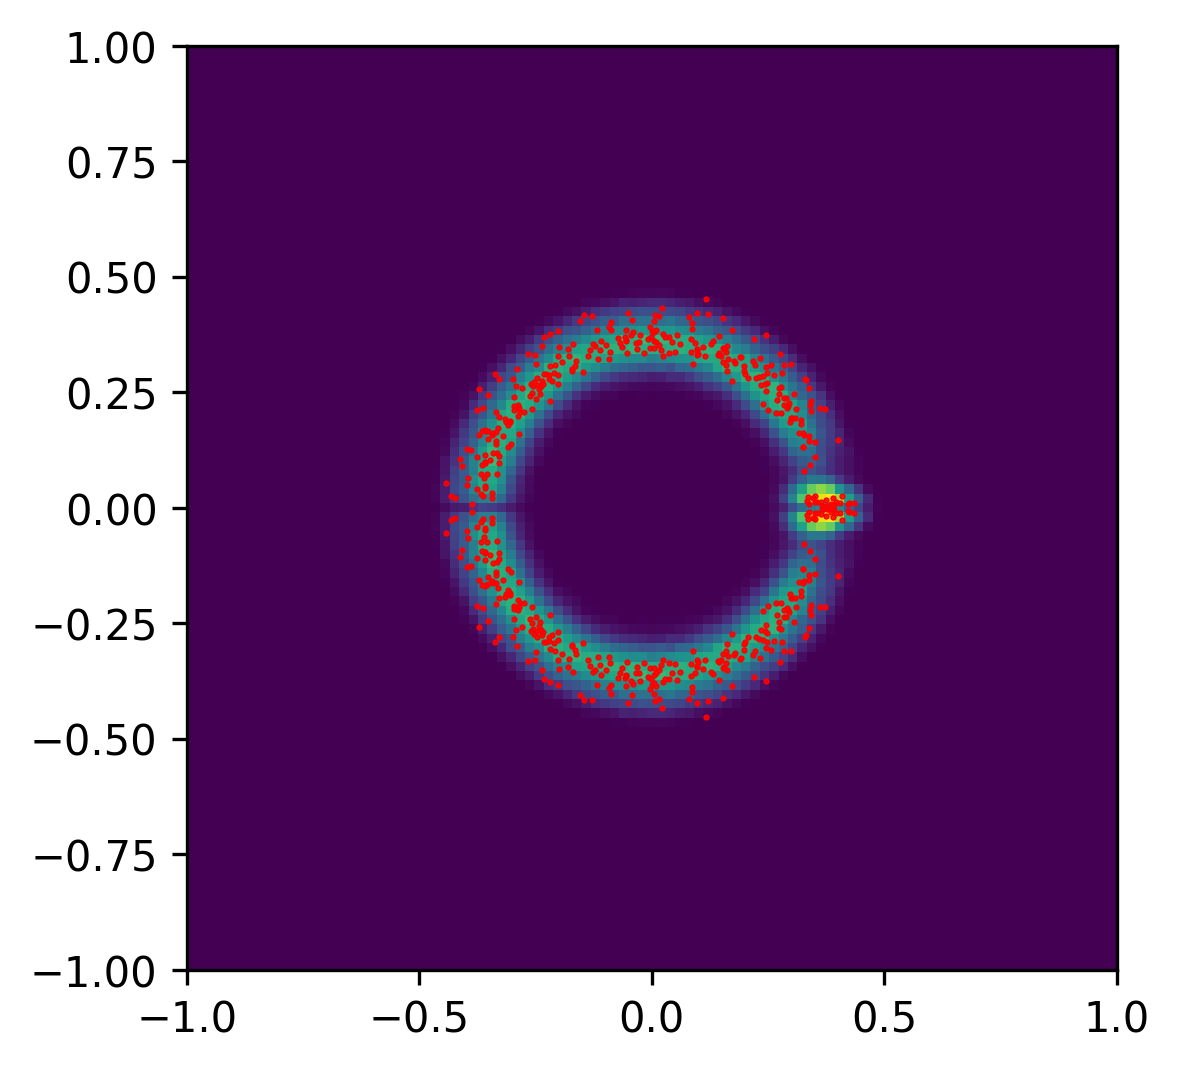

In [13]:
fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 100))
for spectrum in spectrum_target_list3:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=0.5)

plt.savefig(image_path("diluted_fitting_24layer.pdf"), bbox_inches='tight')
plt.show()

In [14]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

spectrum_resample_list = []
for diluted_model in tqdm(model_best_list4):
    spectrum_resample = resample_diluted(diluted_model, num_samples = 1000, rng=rng)
    spectrum_resample_list.append(spectrum_resample)
    

spectrum_resample = np.concatenate(spectrum_resample_list)

  0%|          | 0/10 [00:00<?, ?it/s]

C:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


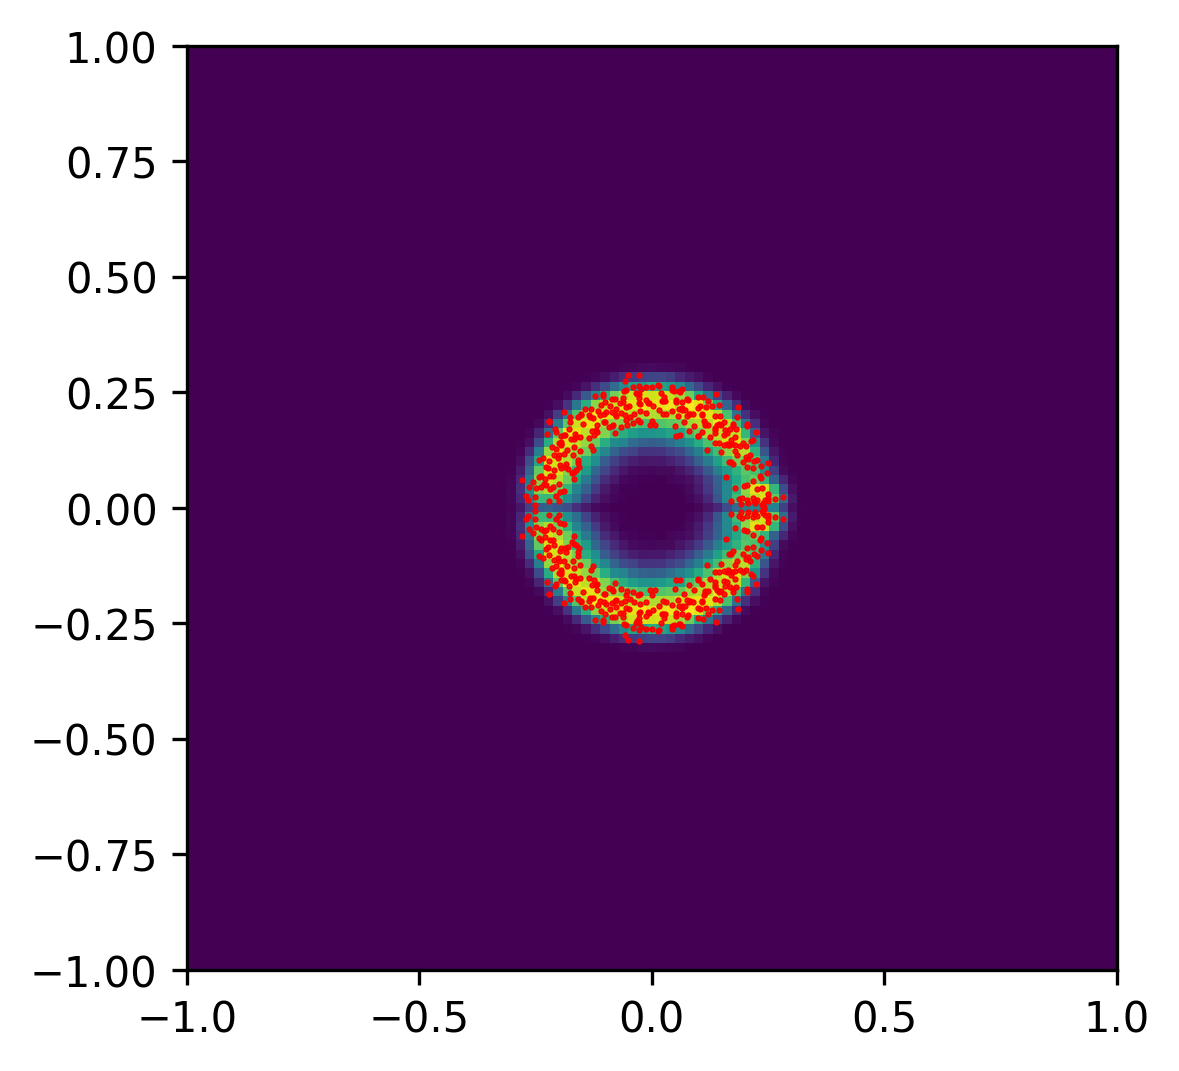

In [15]:
fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 100))
for spectrum in spectrum_target_list4:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro", markersize=0.5)

plt.savefig(image_path("diluted_fitting_32layer.pdf"), bbox_inches='tight')
plt.show()

## Four Qubits

In [43]:
def complex_spacing_ratio(spectrum):
    d = len(spectrum)
    z_list = []
    for i in tqdm(range(d)):
        idx_NN = i
        dist_NN = float("inf")

        idx_NNN = i
        dist_NNN = float("inf")

        for j in range(d):
            if j != i:
                dist = np.abs(spectrum[i] - spectrum[j])
                if dist < dist_NN:
                    dist_NNN = dist_NN
                    idx_NNN = idx_NN

                    dist_NN = dist
                    idx_NN = j
                    
                if (dist > dist_NN) and (dist < dist_NNN):
                    dist_NNN = dist
                    idx_NNN = j

        z = (spectrum[idx_NN] -spectrum[i]) / (spectrum[idx_NNN] - spectrum[i])
        z_list.append(z)

    return z_list

In [52]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 5
channel = KrausMap(d=2**n, rank=2**n)
spectrum = channel_spectrum(channel, use_coords=False)

In [53]:
z_list = complex_spacing_ratio(spectrum)

  0%|          | 0/1024 [00:00<?, ?it/s]

In [54]:
z_list = np.array(z_list)[:,0]

(array([[ 0.,  0.,  9., 15., 23., 21., 15.,  8.,  0.,  0.],
        [ 0.,  9., 19., 27., 21., 20., 28., 18., 10.,  0.],
        [ 7., 21., 22., 12., 10., 10., 12., 19., 22.,  7.],
        [14., 21., 11.,  8.,  4.,  6.,  7.,  9., 24., 14.],
        [19., 27., 14.,  7.,  5.,  6.,  8., 14., 26., 19.],
        [20., 19., 10.,  5.,  3.,  3.,  6., 10., 18., 20.],
        [14., 18., 15.,  5.,  4.,  5.,  4., 16., 18., 17.],
        [ 6., 17.,  9.,  7.,  1.,  1.,  8.,  9., 17.,  6.],
        [ 0.,  5.,  8., 11.,  2.,  2., 11.,  8.,  5.,  0.],
        [ 0.,  0.,  4.,  2.,  0.,  1.,  2.,  4.,  0.,  0.]]),
 array([-0.9806, -0.7826, -0.5846, -0.3866, -0.1885,  0.0095,  0.2075,
         0.4056,  0.6036,  0.8016,  0.9996]),
 array([-0.9997, -0.8003, -0.6008, -0.4014, -0.202 , -0.0026,  0.1969,
         0.3963,  0.5957,  0.7952,  0.9946]),
 <matplotlib.collections.QuadMesh at 0x27cc9bc77f0>)

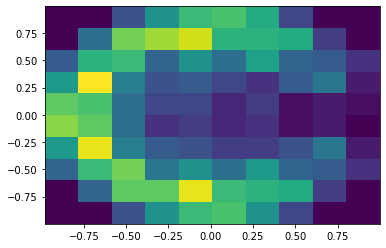

In [55]:
plt.hist2d(np.real(z_list), np.imag(z_list))

In [57]:
spectrum1 = np.array(channel_spectrum(model1.channel, use_coords=False))
z_list = complex_spacing_ratio(spectrum1)
z_list = np.array(z_list)[:,0]

  0%|          | 0/256 [00:00<?, ?it/s]

(array([[0., 0., 2., 3., 5., 5., 3., 2., 0., 0.],
        [1., 1., 2., 3., 3., 4., 3., 2., 1., 1.],
        [5., 8., 3., 6., 2., 2., 5., 3., 8., 5.],
        [3., 1., 2., 0., 1., 2., 0., 2., 1., 3.],
        [4., 6., 4., 3., 0., 0., 3., 4., 6., 4.],
        [5., 4., 3., 0., 0., 0., 0., 3., 4., 5.],
        [6., 4., 4., 2., 1., 1., 2., 4., 4., 6.],
        [5., 5., 2., 3., 1., 2., 3., 2., 5., 6.],
        [0., 5., 2., 2., 2., 2., 2., 2., 5., 0.],
        [0., 0., 1., 1., 0., 1., 1., 1., 0., 0.]]),
 array([-0.996 , -0.7994, -0.6028, -0.4062, -0.2096, -0.0131,  0.1835,
         0.3801,  0.5767,  0.7733,  0.9698]),
 array([-9.3596e-01, -7.4877e-01, -5.6158e-01, -3.7439e-01, -1.8719e-01,
        -2.5535e-14,  1.8719e-01,  3.7439e-01,  5.6158e-01,  7.4877e-01,
         9.3596e-01]),
 <matplotlib.collections.QuadMesh at 0x27cc9bb0b20>)

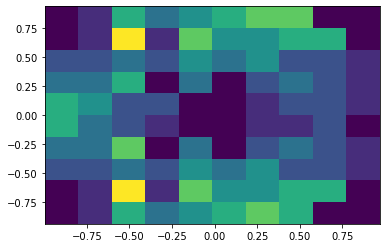

In [58]:
plt.hist2d(np.real(z_list), np.imag(z_list))

In [25]:
[model1, model2, model3, model4, model5] = loader(data_path("belem_4qubit_repeated.model"))

spectrum1 = channel_spectrum(model1.channel, use_coords=True)
spectrum2 = channel_spectrum(model2.channel, use_coords=True) 
spectrum3 = channel_spectrum(model3.channel, use_coords=True)
spectrum4 = channel_spectrum(model4.channel, use_coords=True)
spectrum5 = channel_spectrum(model5.channel, use_coords=True)

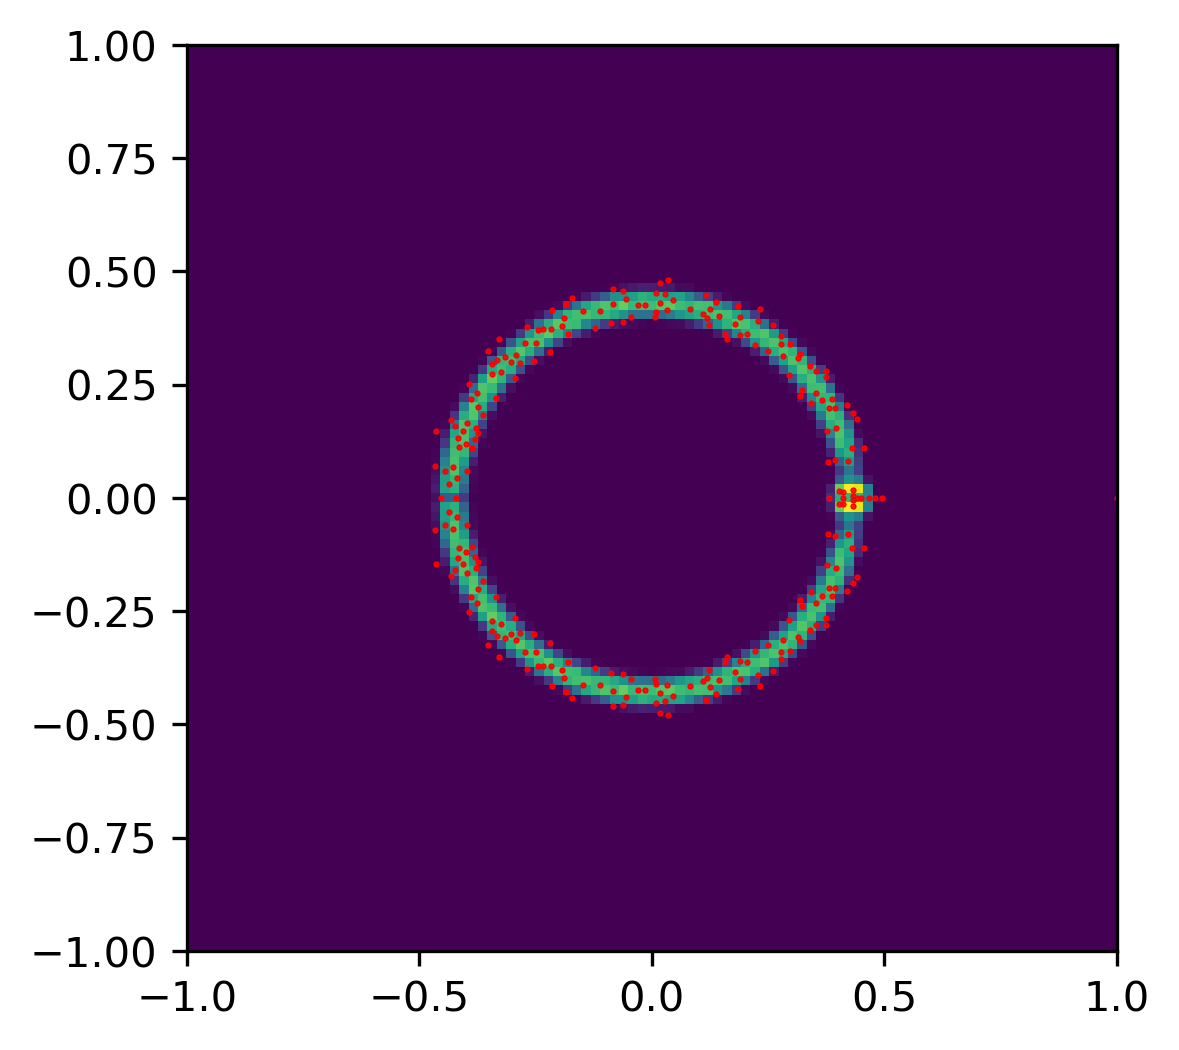

In [93]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

[distance1, diluted1] = loader(data_path("diluted_fitting_4qubit_8layer.model"))

spectrum_resample = resample_diluted(diluted1, num_samples = 1000, rng=rng)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 100))
plt.plot(spectrum1[:,0], spectrum1[:,1], "ro", markersize=0.5)
plt.show()

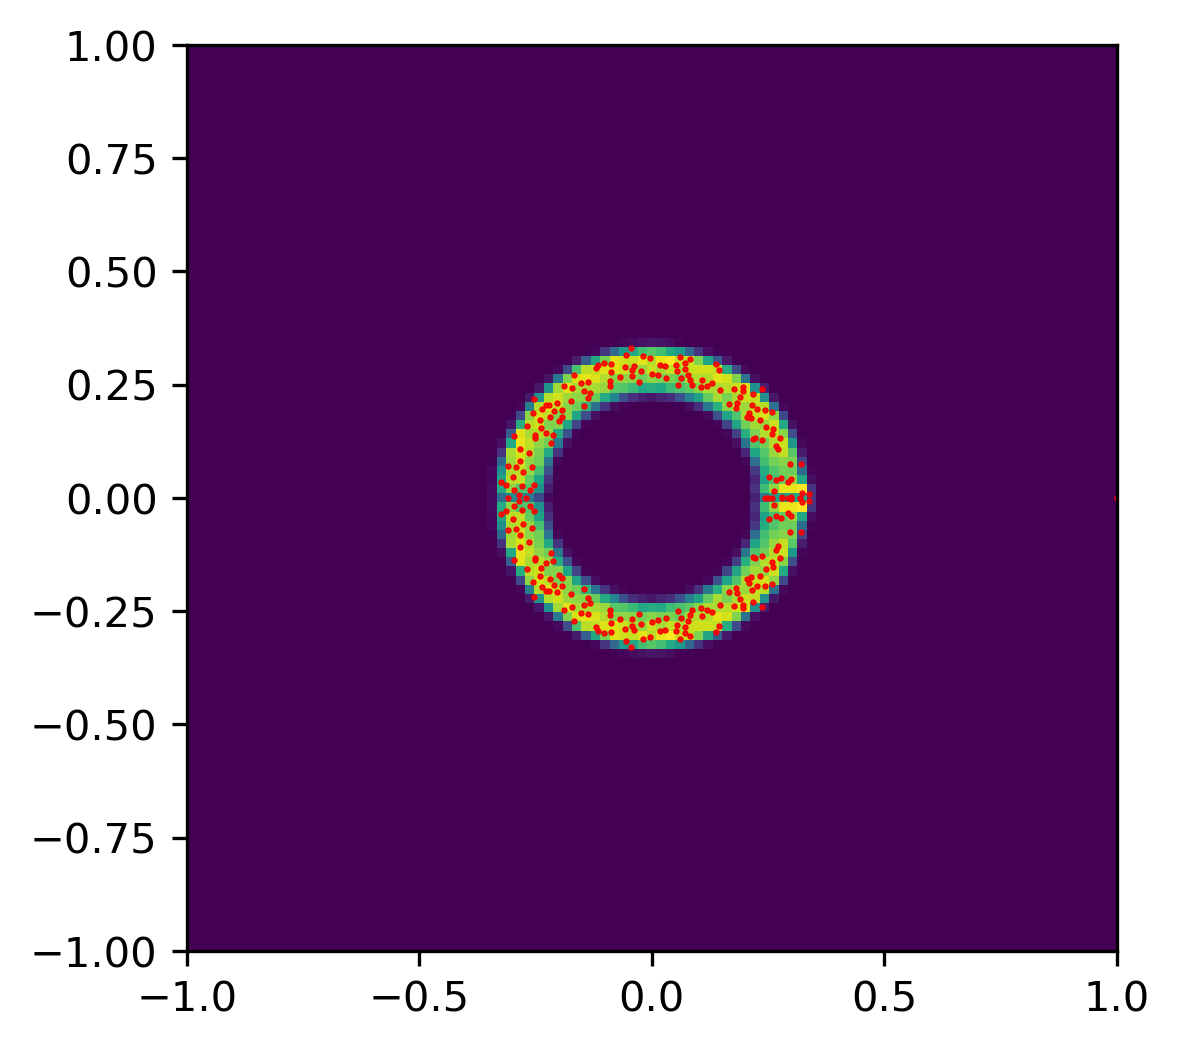

In [94]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

[distance2, diluted2] = loader(data_path("diluted_fitting_4qubit_16layer.model"))

spectrum_resample = resample_diluted(diluted2, num_samples = 1000, rng=rng)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 100))
plt.plot(spectrum2[:,0], spectrum2[:,1], "ro", markersize=0.5)
plt.show()

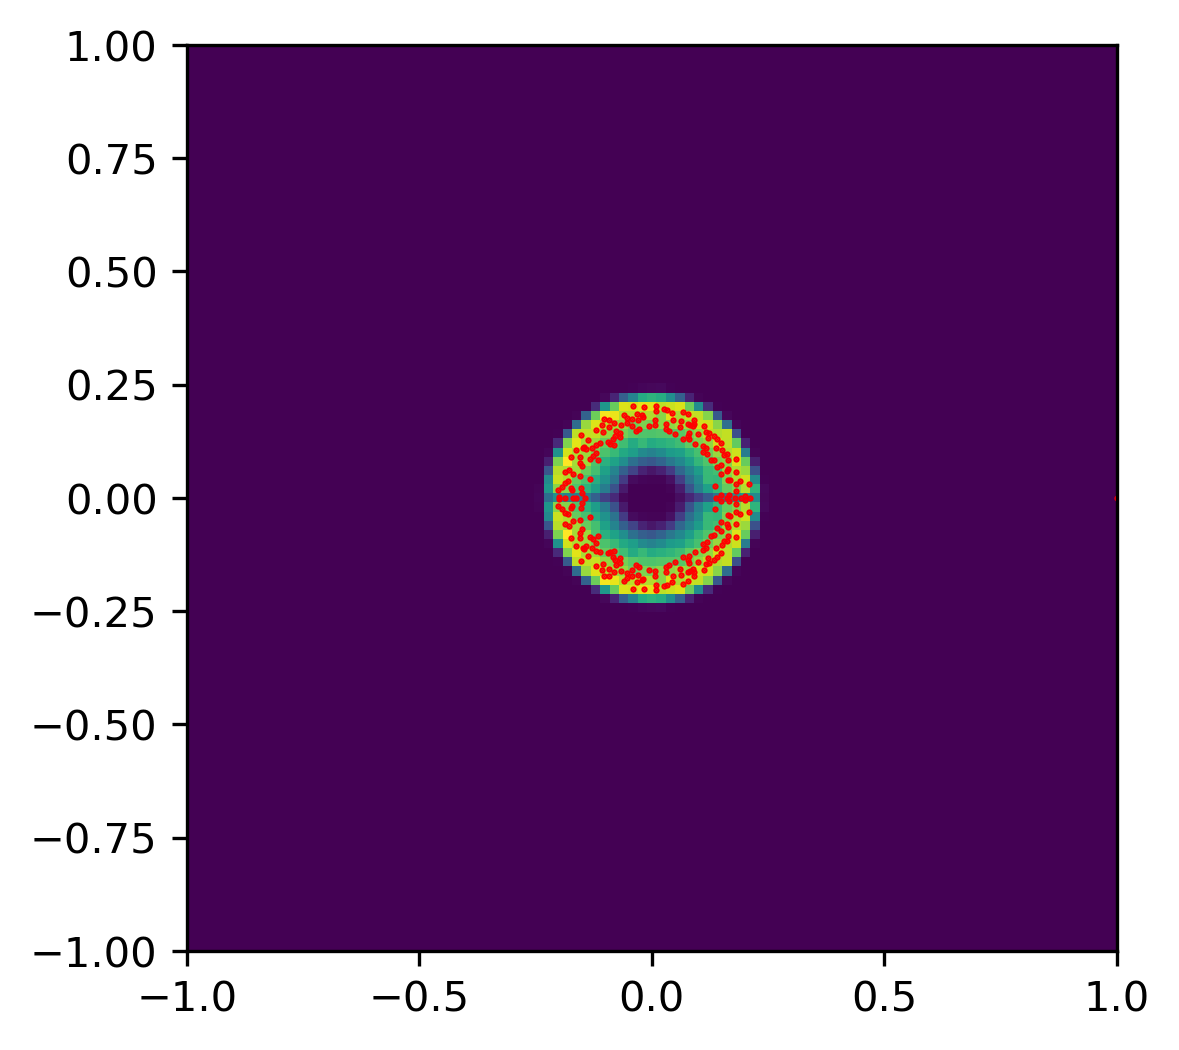

In [97]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

[distance3, diluted3] = loader(data_path("diluted_fitting_4qubit_24layer.model"))

spectrum_resample = resample_diluted(diluted3, num_samples = 1000, rng=rng)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 100))
plt.plot(spectrum3[:,0], spectrum3[:,1], "ro", markersize=0.5)
plt.show()

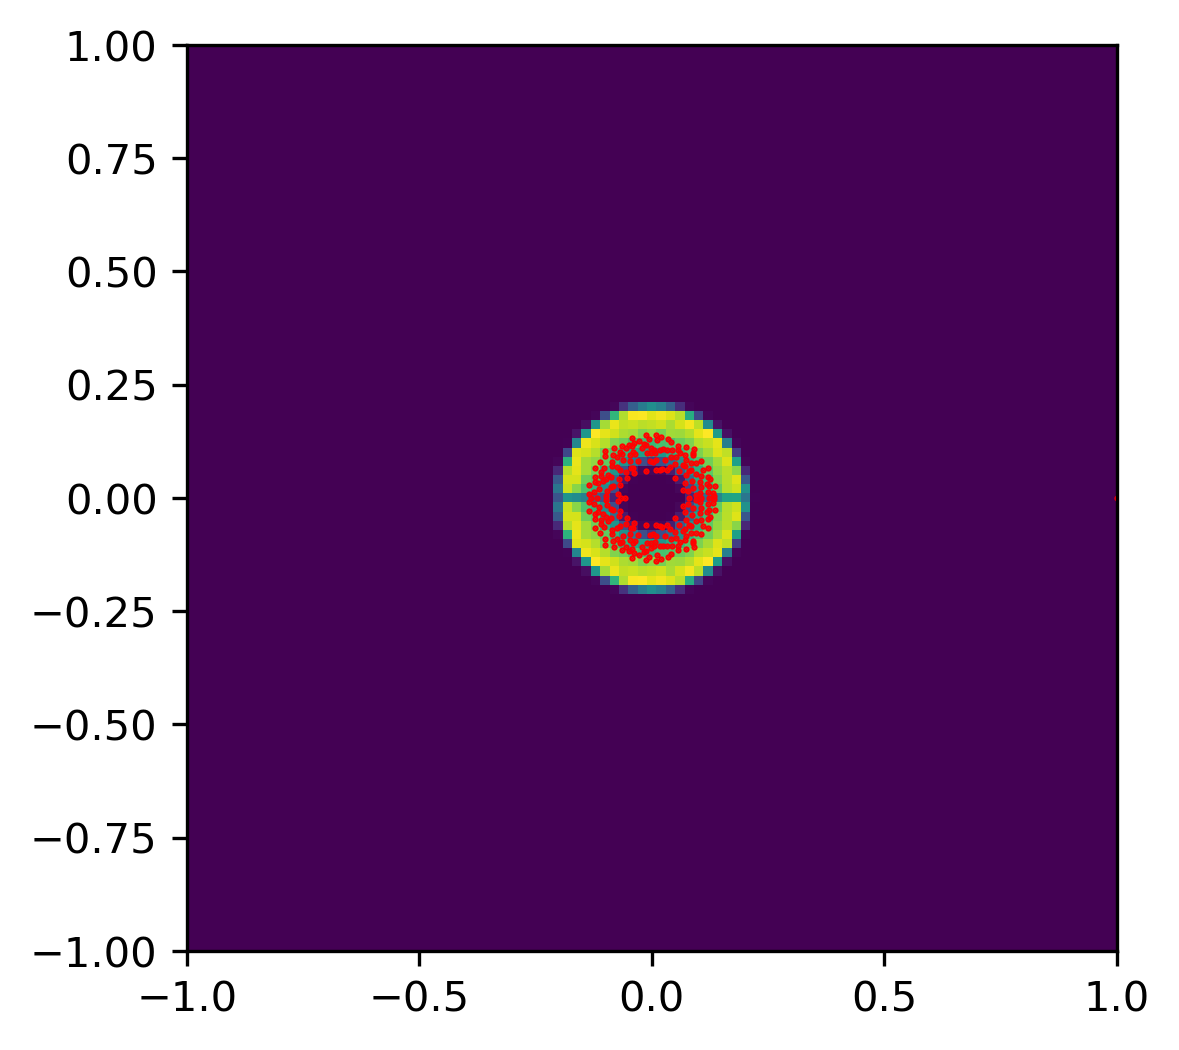

In [99]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
rng = np.random.default_rng(seed=42)

[distance4, diluted4] = loader(data_path("diluted_fitting_4qubit_32layer.model"))

spectrum_resample = resample_diluted(diluted4, num_samples = 1000, rng=rng)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.hist2d(spectrum_resample[:,0], spectrum_resample[:,1], bins = np.linspace(-1, 1, 100))
plt.plot(spectrum4[:,0], spectrum4[:,1], "ro", markersize=0.5)
plt.show()